# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

### Konwersja do obrazu w odcieniach szarości

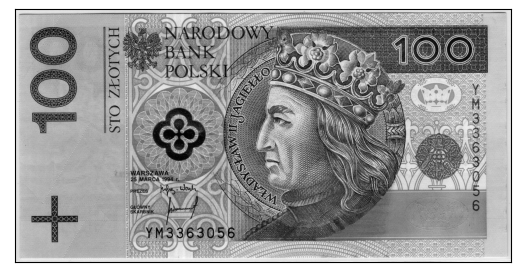

In [175]:
I = plt.imread(fileName)
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.gray()
plt.show()

### Stworzenie tablic z wartościami binarnymi na poszczególnych bitach

Big endian indexing


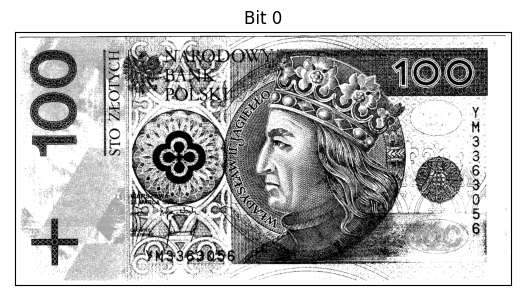

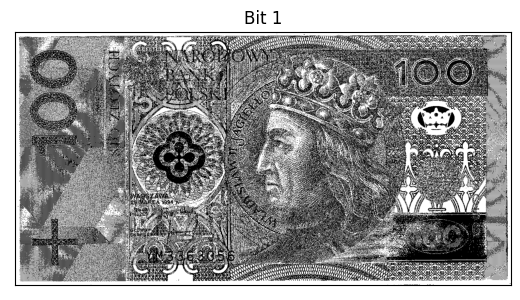

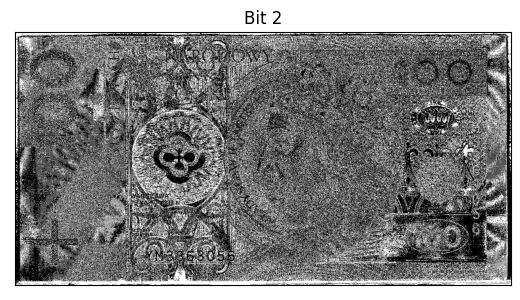

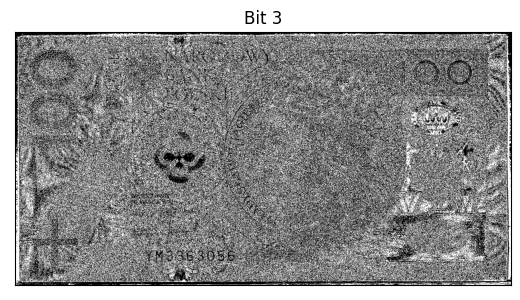

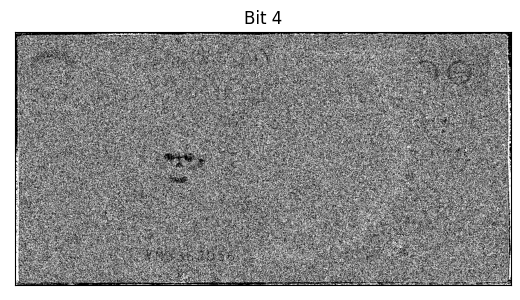

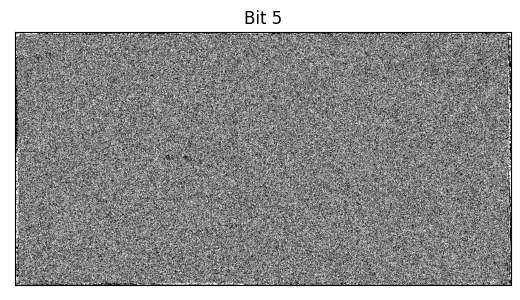

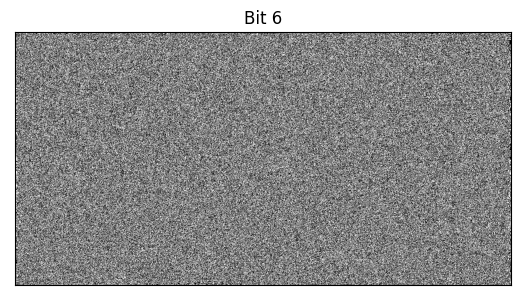

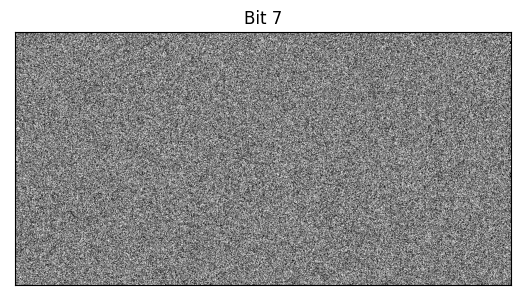

In [177]:
import numpy as np

bits = 8

# 8 2D arrays, each for one bit
pixel_arrays = np.array([[[0 for _ in range(len(I[i]))] for i in range(len(I))] for _ in range(bits)], dtype=np.uint8)

for i in range(len(I)):
    for j in range(len(I[i])):
        # Converting to binary form
        # I cut the first 2 characters because they are always "0b" which is useless in this case
        # I also pad it to make it easier to put it into the array
        bin_pixel = bin(I[i][j])[2:].zfill(bits)
        for k in range(bits):
            # k-th bit of a value located in i-th row and j-th column
            pixel_arrays[k][i][j] = bin_pixel[k]

# pixel_arrays
print("Big endian indexing")
for k in range(bits):
    plt.title(f"Bit {k}")
    plt.imshow(pixel_arrays[k])
    plt.xticks([]), plt.yticks([])
    plt.show()

### Odtwarzanie oryginalnego obrazu

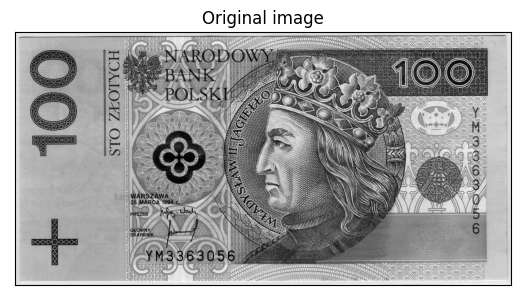

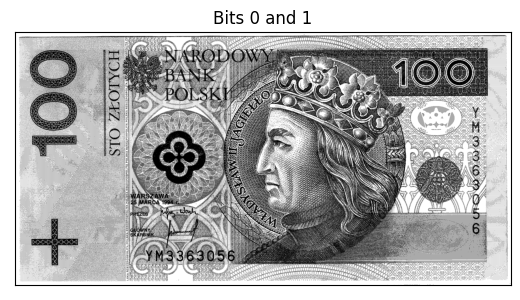

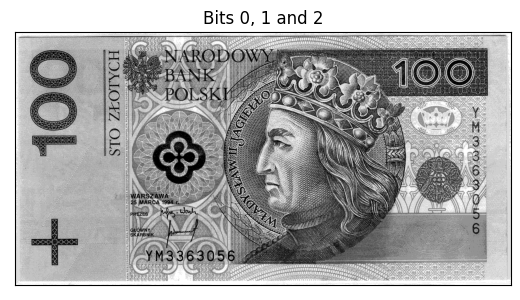

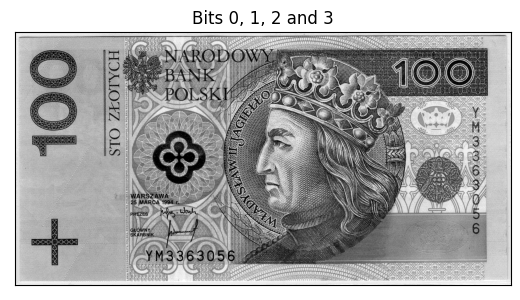

In [179]:
def get_dec_value(bit_idx, bits_arr):
    for i in range(len(I)):
        for j in range(len(I[i])):
            bits_arr[i][j] += pixel_arrays[bit_idx][i][j] << (8 - bit_idx)

# Original image for comparison
plt.title("Original image")
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

# 0th and 1st bits
summed_bits = np.array([[0 for _ in range(len(I[i]))] for i in range(len(I))])
get_dec_value(0, summed_bits)
get_dec_value(1, summed_bits)

plt.title("Bits 0 and 1")
plt.imshow(summed_bits)
plt.xticks([]), plt.yticks([])
plt.show()

# 0th, 1st and 2nd bits
# 0th and 1st bits are already added
get_dec_value(2, summed_bits)

plt.title("Bits 0, 1 and 2")
plt.imshow(summed_bits)
plt.xticks([]), plt.yticks([])
plt.show()

# 0th, 1st, 2nd and 3rd bits
# 0th, 1st and 2nd bits are already added
get_dec_value(3, summed_bits)

plt.title("Bits 0, 1, 2 and 3")
plt.imshow(summed_bits)
plt.xticks([]), plt.yticks([])
plt.show()